In [1]:
import sys
sys.path.append('../') 
from imports import *

In [2]:
# Load the saved datasets
X_train = np.load('./fashion-mnist-processed-data/train_data.npy')
X_val = np.load('./fashion-mnist-processed-data/val_data.npy')
X_test = np.load('./fashion-mnist-processed-data/test_data.npy')

y_train = np.load('./fashion-mnist-processed-data/train_targets.npy')
y_val = np.load('./fashion-mnist-processed-data/val_targets.npy')
y_test = np.load('./fashion-mnist-processed-data/test_targets.npy')

In [3]:
# Reshape the training data
n_samples, height, width = X_train.shape
X_train_reshaped = X_train.reshape((n_samples, height*width))

n_val_samples, height_val, width_val = X_val.shape
n_test_samples, height_test, width_test = X_test.shape

# Similarly, reshape the validation and test data if necessary
X_val_reshaped = X_val.reshape((n_val_samples, height_val*width_val))
X_test_reshaped = X_test.reshape((n_test_samples, height_test*width_test))

In [4]:
X_train_reshaped.shape

(54000, 784)

In [6]:
x_train_1 = X_train.reshape((X_train.shape[0], -1))
x_train_1.shape

(54000, 784)

In [10]:
# Step 1: Apply PCA
# Choose the number of components, e.g., 2 for visualization
pca = PCA(n_components='mle')
X_train_pca = pca.fit_transform(X_train_reshaped)
X_val_pca = pca.transform(X_val_reshaped)
X_test_pca = pca.transform(X_test_reshaped)

# Step 2: Train KNN Classifier
# Choose the number of neighbors, e.g., 3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_pca, y_train)

# Step 3: Predict and Evaluate the model
y_val_pred = knn.predict(X_val_pca)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"Validation Accuracy: {val_accuracy:.4f}")

print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

Validation Accuracy: 0.8563
[[531   0  10   6   0   0  49   0   4   0]
 [  4 583   1   8   0   0   4   0   0   0]
 [ 16   1 495   2  40   0  45   1   0   0]
 [ 39   4  12 492  29   0  24   0   0   0]
 [  1   2  82  20 458   0  36   0   1   0]
 [  2   0   0   0   0 506   2  50   2  38]
 [111   1  88   9  30   0 361   0   0   0]
 [  0   0   0   0   0   1   0 565   0  34]
 [  6   1   9   3   2   1   8   3 567   0]
 [  0   0   0   0   1   2   0  17   0 580]]
              precision    recall  f1-score   support

           0       0.75      0.89      0.81       600
           1       0.98      0.97      0.98       600
           2       0.71      0.82      0.76       600
           3       0.91      0.82      0.86       600
           4       0.82      0.76      0.79       600
           5       0.99      0.84      0.91       600
           6       0.68      0.60      0.64       600
           7       0.89      0.94      0.91       600
           8       0.99      0.94      0.97       600


In [11]:
# Create a pipeline that first applies PCA and then KNN
pipe = Pipeline([
    ('pca', PCA()),
    ('knn', KNeighborsClassifier())
])

# Define the parameter grid to search
param_grid = {
    'pca__n_components': [0.2, 0.5, 0.9, 2, 5, 10, 50, 100],  # Example values
    'knn__n_neighbors': [1, 5, 10, 30, 50, 100]      # Example values
}

# Create a GridSearchCV object
grid_search = GridSearchCV(pipe, param_grid, cv=5, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_reshaped, y_train)

# Print the best parameters and the corresponding score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ..........knn__n_neighbors=1, pca__n_components=0.2; total time=   1.8s
[CV] END ..........knn__n_neighbors=1, pca__n_components=0.2; total time=   1.7s
[CV] END ..........knn__n_neighbors=1, pca__n_components=0.2; total time=   1.7s
[CV] END ..........knn__n_neighbors=1, pca__n_components=0.2; total time=   1.7s
[CV] END ..........knn__n_neighbors=1, pca__n_components=0.2; total time=   1.9s
[CV] END ..........knn__n_neighbors=1, pca__n_components=0.5; total time=   1.8s
[CV] END ..........knn__n_neighbors=1, pca__n_components=0.5; total time=   2.0s
[CV] END ..........knn__n_neighbors=1, pca__n_components=0.5; total time=   1.8s
[CV] END ..........knn__n_neighbors=1, pca__n_components=0.5; total time=   1.8s
[CV] END ..........knn__n_neighbors=1, pca__n_components=0.5; total time=   1.7s
[CV] END ..........knn__n_neighbors=1, pca__n_components=0.9; total time=   1.9s
[CV] END ..........knn__n_neighbors=1, pca__n_c

In [12]:
# now same pipeline with the best parameters
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train_reshaped)
X_val_pca = pca.transform(X_val_reshaped)
X_test_pca = pca.transform(X_test_reshaped)

# Step 2: Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_pca, y_train)

# Step 3: Predict and Evaluate the model
y_val_pred = knn.predict(X_val_pca)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"Validation Accuracy: {val_accuracy:.4f}")

print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

Validation Accuracy: 0.8642
[[539   0   9   9   2   0  35   0   6   0]
 [  4 579   4   8   1   0   4   0   0   0]
 [  9   0 476   4  49   0  57   1   4   0]
 [ 29   3   7 504  33   0  23   0   1   0]
 [  0   1  46  20 487   0  44   0   2   0]
 [  0   0   0   1   0 527   1  43   2  26]
 [112   0  75   9  46   0 354   0   4   0]
 [  0   0   0   0   0   6   0 572   0  22]
 [  2   1   5   3   4   1  10   4 570   0]
 [  0   0   0   0   0   4   0  19   0 577]]
              precision    recall  f1-score   support

           0       0.78      0.90      0.83       600
           1       0.99      0.96      0.98       600
           2       0.77      0.79      0.78       600
           3       0.90      0.84      0.87       600
           4       0.78      0.81      0.80       600
           5       0.98      0.88      0.93       600
           6       0.67      0.59      0.63       600
           7       0.90      0.95      0.92       600
           8       0.97      0.95      0.96       600


Test Accuracy: 0.8602
[[852   0  16  20   7   1  91   1  12   0]
 [  7 963   2  17   7   0   3   0   1   0]
 [ 18   1 783   8 102   0  84   0   4   0]
 [ 31   5  13 876  39   0  32   0   4   0]
 [  1   0  96  24 792   0  82   0   5   0]
 [  0   0   0   0   0 894   0  59   1  46]
 [181   0 118  22  95   0 569   0  15   0]
 [  0   0   0   0   0   9   0 955   0  36]
 [  1   0   9   4   8   0   9   6 962   1]
 [  0   0   0   0   0   2   0  41   1 956]]
              precision    recall  f1-score   support

           0       0.78      0.85      0.81      1000
           1       0.99      0.96      0.98      1000
           2       0.76      0.78      0.77      1000
           3       0.90      0.88      0.89      1000
           4       0.75      0.79      0.77      1000
           5       0.99      0.89      0.94      1000
           6       0.65      0.57      0.61      1000
           7       0.90      0.95      0.93      1000
           8       0.96      0.96      0.96      1000
      

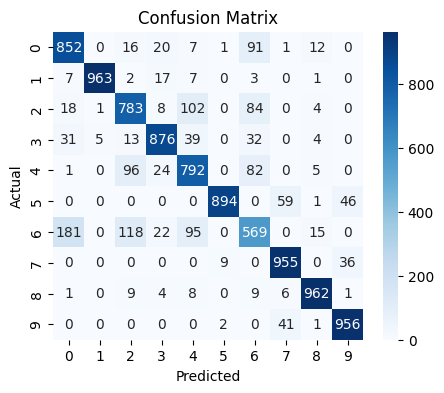

In [14]:
# Step 4: Evaluate the model on test data
# Use the KNN model to predict on the test set
y_test_pred = knn.predict(X_test_pca)

# Generating the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(cm)
print(classification_report(y_test, y_test_pred))


# Plotting the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()